# 準備

In [5]:
# Google driveのマウント
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#sys.pathの設定
#以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

import sys
sys.path.append('/content/drive/My Drive/DNN_code_colab_lesson_1_2')
sys.path.append('/content/drive/My Drive/DNN_code_colab_lesson_1_2/lesson_2')

# overfitting

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.14333333333333334
                : 10. 正答率(テスト) = 0.1215
Generation: 20. 正答率(トレーニング) = 0.17
                : 20. 正答率(テスト) = 0.1427
Generation: 30. 正答率(トレーニング) = 0.21
                : 30. 正答率(テスト) = 0.182
Generation: 40. 正答率(トレーニング) = 0.25
                : 40. 正答率(テスト) = 0.2045
Generation: 50. 正答率(トレーニング) = 0.29
                : 50. 正答率(テスト) = 0.2339
Generation: 60. 正答率(トレーニング) = 0.3466666666666667
                : 60. 正答率(テスト) = 0.2542
Generation: 70. 正答率(トレーニング) = 0.39
                : 70. 正答率(テスト) = 0.2993
Generation: 80. 正答率(トレーニング) = 0.44
                : 80. 正答率(テスト) = 0.3495
Generation: 90. 正答率(トレーニング) = 0.4666666666666667
                : 90. 正答率(テスト) = 0.3838
Generation: 100. 正答率(トレーニング) = 0.5266666666666666
                : 100. 正答率(テスト) = 0.4106
Generation: 110. 正答率(トレーニング) = 0.5766666666666667
                : 110. 正答率(テスト) = 0.4447
Generation: 120. 正答率(トレーニング) = 0.6533333333333333
                : 120. 正答率(テスト) = 0.4786


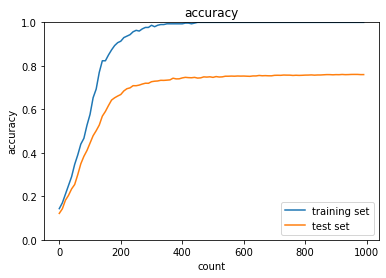

In [7]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer


(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## weight decay
### L2

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.13666666666666666
                : 10. 正答率(テスト) = 0.1141
Generation: 20. 正答率(トレーニング) = 0.19666666666666666
                : 20. 正答率(テスト) = 0.1507
Generation: 30. 正答率(トレーニング) = 0.27
                : 30. 正答率(テスト) = 0.188
Generation: 40. 正答率(トレーニング) = 0.35333333333333333
                : 40. 正答率(テスト) = 0.2302
Generation: 50. 正答率(トレーニング) = 0.42333333333333334
                : 50. 正答率(テスト) = 0.2747
Generation: 60. 正答率(トレーニング) = 0.5066666666666667
                : 60. 正答率(テスト) = 0.3468
Generation: 70. 正答率(トレーニング) = 0.5633333333333334
                : 70. 正答率(テスト) = 0.38
Generation: 80. 正答率(トレーニング) = 0.6333333333333333
                : 80. 正答率(テスト) = 0.4401
Generation: 90. 正答率(トレーニング) = 0.7033333333333334
                : 90. 正答率(テスト) = 0.4907
Generation: 100. 正答率(トレーニング) = 0.7066666666666667
                : 100. 正答率(テスト) = 0.5193
Generation: 110. 正答率(トレーニング) = 0.76
                : 110. 正答率(テスト) = 0.5484
Generation: 120. 正答率(トレーニング) = 0.7

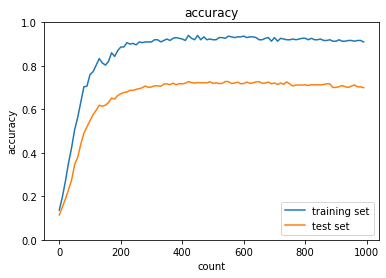

In [8]:
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.1
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

# L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.51
                : 10. 正答率(テスト) = 0.3672
Generation: 20. 正答率(トレーニング) = 0.6233333333333333
                : 20. 正答率(テスト) = 0.5303
Generation: 30. 正答率(トレーニング) = 0.6766666666666666
                : 30. 正答率(テスト) = 0.5571
Generation: 40. 正答率(トレーニング) = 0.6633333333333333
                : 40. 正答率(テスト) = 0.5352
Generation: 50. 正答率(トレーニング) = 0.5933333333333334
                : 50. 正答率(テスト) = 0.4936
Generation: 60. 正答率(トレーニング) = 0.5366666666666666
                : 60. 正答率(テスト) = 0.4544
Generation: 70. 正答率(トレーニング) = 0.5766666666666667
                : 70. 正答率(テスト) = 0.4582
Generation: 80. 正答率(トレーニング) = 0.5733333333333334
                : 80. 正答率(テスト) = 0.4501
Generation: 90. 正答率(トレーニング) = 0.7033333333333334
                : 90. 正答率(テスト) = 0.5336
Generation: 100. 正答率(トレーニング) = 0.5766666666666667
                : 100. 正答率(テスト) = 0.4612
Generation: 110. 正答率(トレーニング) = 0.5966666666666667
                : 110. 正答率(テスト) = 0.4798
Generation: 120. 正答率(

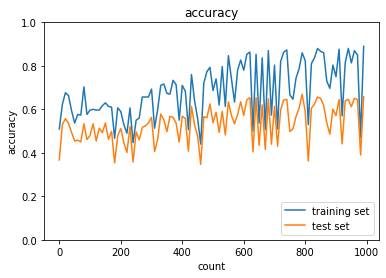

In [9]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.01 # 0.005
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

# [try] weight_decay_lambdaの値を変更して正則化の強さを確認しよう


# Dropout

In [11]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask


データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.35333333333333333
                : 10. 正答率(テスト) = 0.2569
Generation: 20. 正答率(トレーニング) = 0.45666666666666667
                : 20. 正答率(テスト) = 0.4142
Generation: 30. 正答率(トレーニング) = 0.62
                : 30. 正答率(テスト) = 0.5346
Generation: 40. 正答率(トレーニング) = 0.6866666666666666
                : 40. 正答率(テスト) = 0.5821
Generation: 50. 正答率(トレーニング) = 0.7633333333333333
                : 50. 正答率(テスト) = 0.6209
Generation: 60. 正答率(トレーニング) = 0.8466666666666667
                : 60. 正答率(テスト) = 0.6689
Generation: 70. 正答率(トレーニング) = 0.9233333333333333
                : 70. 正答率(テスト) = 0.7189
Generation: 80. 正答率(トレーニング) = 0.9366666666666666
                : 80. 正答率(テスト) = 0.7271
Generation: 90. 正答率(トレーニング) = 0.9566666666666667
                : 90. 正答率(テスト) = 0.7474
Generation: 100. 正答率(トレーニング) = 0.97
                : 100. 正答率(テスト) = 0.7465
Generation: 110. 正答率(トレーニング) = 0.9833333333333333
                : 110. 正答率(テスト) = 0.7558
Generation: 120. 正答率(トレーニング) = 0.

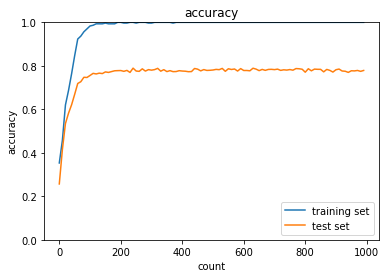

In [12]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15  # 0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
# optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

# [try] dropout_ratioの値を変更してみよう
# [try] optimizerとdropout_ratioの値を変更してみよう


## Dropout + L

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.11
                : 10. 正答率(テスト) = 0.0959
Generation: 20. 正答率(トレーニング) = 0.16666666666666666
                : 20. 正答率(テスト) = 0.1268
Generation: 30. 正答率(トレーニング) = 0.21
                : 30. 正答率(テスト) = 0.1595
Generation: 40. 正答率(トレーニング) = 0.25333333333333335
                : 40. 正答率(テスト) = 0.1912
Generation: 50. 正答率(トレーニング) = 0.2966666666666667
                : 50. 正答率(テスト) = 0.2155
Generation: 60. 正答率(トレーニング) = 0.31333333333333335
                : 60. 正答率(テスト) = 0.2364
Generation: 70. 正答率(トレーニング) = 0.31666666666666665
                : 70. 正答率(テスト) = 0.2539
Generation: 80. 正答率(トレーニング) = 0.3333333333333333
                : 80. 正答率(テスト) = 0.2639
Generation: 90. 正答率(トレーニング) = 0.3433333333333333
                : 90. 正答率(テスト) = 0.2831
Generation: 100. 正答率(トレーニング) = 0.36333333333333334
                : 100. 正答率(テスト) = 0.301
Generation: 110. 正答率(トレーニング) = 0.36333333333333334
                : 110. 正答率(テスト) = 0.3004
Generation: 120. 正答率(トレーニング) =

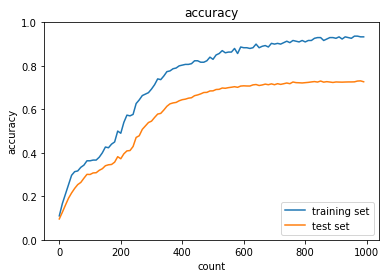

In [13]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.08
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []
hidden_layer_num = network.hidden_layer_num

plot_interval=10

# 正則化強度設定 ======================================
weight_decay_lambda=0.004
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()